In [1]:
# we first load the class module

import dipolarBEC


In [2]:
# then python modules

from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [3]:
#check which interaction is used and save fig in the appropriate subfolder

fv = 'd'

if fv == 'd':
    fpath = "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\dip\\"
elif fv == 'NN':
    fpath = "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\NN\\"

[[ 0.00438 -0.00875 -0.01311 ...  0.01311 -0.00875 -0.00438]
 [-0.00875  0.01746  0.02611 ...  0.02611 -0.01746 -0.00875]
 [ 0.01311 -0.02611 -0.03888 ...  0.03888 -0.02611 -0.01311]
 ...
 [-0.01311 -0.02611  0.03888 ...  0.03888  0.02611 -0.01311]
 [ 0.00875  0.01746 -0.02611 ...  0.02611  0.01746 -0.00875]
 [-0.00438 -0.00875  0.01311 ...  0.01311  0.00875 -0.00438]]
[[-0.00004  0.00009  0.00013 ... -0.00013  0.00009  0.00004]
 [ 0.00009 -0.00017 -0.00026 ... -0.00026  0.00017  0.00009]
 [-0.00013  0.00026  0.00038 ... -0.00038  0.00026  0.00013]
 ...
 [ 0.00013  0.00026 -0.00038 ... -0.00038 -0.00026  0.00013]
 [-0.00009 -0.00017  0.00026 ... -0.00026 -0.00017  0.00009]
 [ 0.00004  0.00009 -0.00013 ... -0.00013 -0.00009  0.00004]]
fold-v2 (100,) (200,)
fold-v2 (100,) (200,)
Optimal parameters are: a=0.000000, L=1.000000


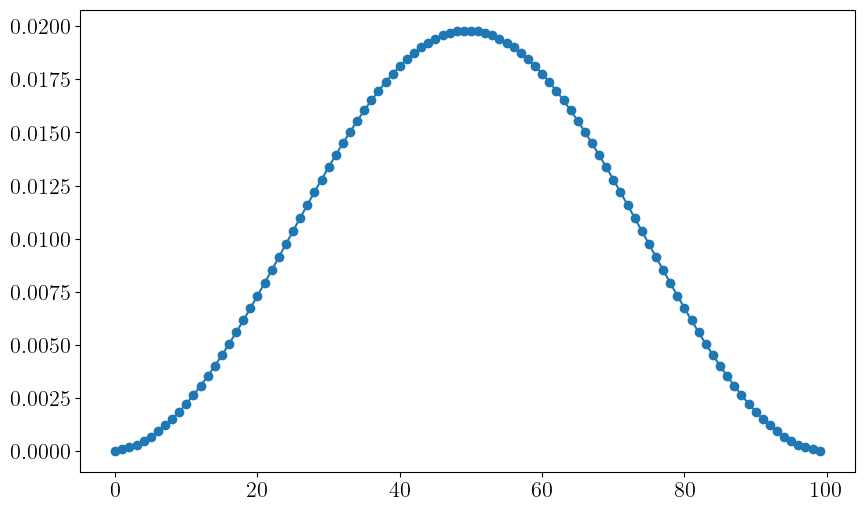

In [4]:
# first try: just run for a fixed N 

from scipy.optimize import curve_fit

Ntubes = 100
kx = 10
Uc = 1.0
Ud = 0.5
Ndisr = 100
sigma = 0.0

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

run1 = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

#print( run1.IPRAllDisr() )
#print( run1.IPRDisr() )
val,U,V = run1.BogUV(nb)
#print(val)
np.set_printoptions(precision=5, suppress=True)
#print(U.shape)
#print(V.shape)
print(U)
print(V)

def func(x, a, L):
    return a * np.exp(x/L)

xdata = range(len(run1.wfLowestState()))
#print(len(xdata))
ydata = run1.wfLowestState()
#print(len(ydata))

popt, pcov = curve_fit(func, xdata, ydata)
# Print the optimal parameters a, L
print("Optimal parameters are: a=%f, L=%f" % (popt[0], popt[1]))

plt.figure(figsize=(10,6))
plt.plot(xdata, ydata, marker='o')
plt.show()

In [5]:
# let's plot u's,v's vs k for N=2 and fixed Ud,sigma

sigma = 0.5
Ntubes = 2
Uc = 1.0
Ud = 0.5
Ndisr = 100

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

kdar = np.arange(0.00000000000000001, 3, 0.1)

U_k = []
V_k = []

for kx in tqdm(kdar):

    runk = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

    U_k.append( runk.BogUV(nb)[1] )
    V_k.append( runk.BogUV(nb)[2] )

# Convert U_k and V_k to numpy arrays
U_k_array = np.array(U_k)
V_k_array = np.array(V_k)

# Get the shape of the matrices
n, m, p = U_k_array.shape

100%|██████████| 30/30 [00:00<00:00, 1250.13it/s]


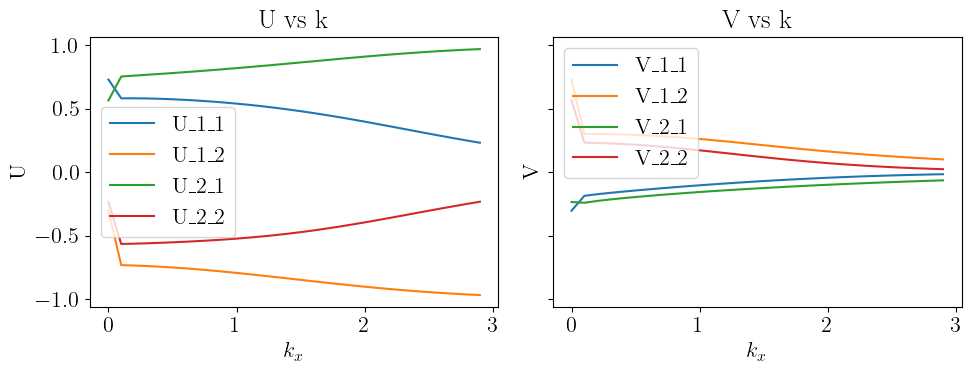

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

# Iterate over all components of the matrices
for i in range(m):
    for j in range(p):
        U_ij = U_k_array[:, i, j]
        V_ij = V_k_array[:, i, j]

        # Check the sign of each U_ij and V_ij by comparing it to the first element of each - viscosity not affected bc of U(1) symmetry
        
        U_ij = np.where(np.sign(U_ij[0]) == np.sign(U_ij), U_ij, -U_ij)
        V_ij = np.where(np.sign(V_ij[0]) == np.sign(V_ij), V_ij, -V_ij)

        # Now U_ij and V_ij are arrays of the (i, j) component of each matrix in U_k and V_k
        ax1.plot(kdar, U_ij, label=f'U_{i+1}_{j+1}')
        ax2.plot(kdar, V_ij, label=f'V_{i+1}_{j+1}')


ax1.set_ylabel("U")
ax1.set_xlabel(r"$k_x$")
ax1.set_title('U vs k')
ax1.legend(loc='best')

ax2.set_ylabel("V")
ax2.set_xlabel(r"$k_x$")
ax2.set_title('V vs k')
ax2.legend(loc='best')

fig.tight_layout()
plt.show()

In [6]:
# now we would like to make fancy plots

In [7]:
# we're plotting the spatial (y-axis) distribution of the lowest wavefunction for three values of N=10,100,1000, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.01
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.1
kx_large = 10.0
Uc = 1.0
Ndisr = 100
N1=100
N2=125
N3=150

wf1_sk = []
wf2_sk = []
wf3_sk = []

wf1_lk = []
wf2_lk = []
wf3_lk = []

run1_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
run2_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
run3_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

run1_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
run2_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
run3_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


wf1_sk = run1_sk.wfLowestState()
wf2_sk = run2_sk.wfLowestState()
wf3_sk = run3_sk.wfLowestState()


wf1_lk = run1_lk.wfLowestState()
wf2_lk = run2_lk.wfLowestState()
wf3_lk = run3_lk.wfLowestState()

fold-v2 (100,) (200,)
fold-v2 (125,) (250,)
fold-v2 (150,) (300,)
fold-v2 (100,) (200,)
fold-v2 (125,) (250,)
fold-v2 (150,) (300,)


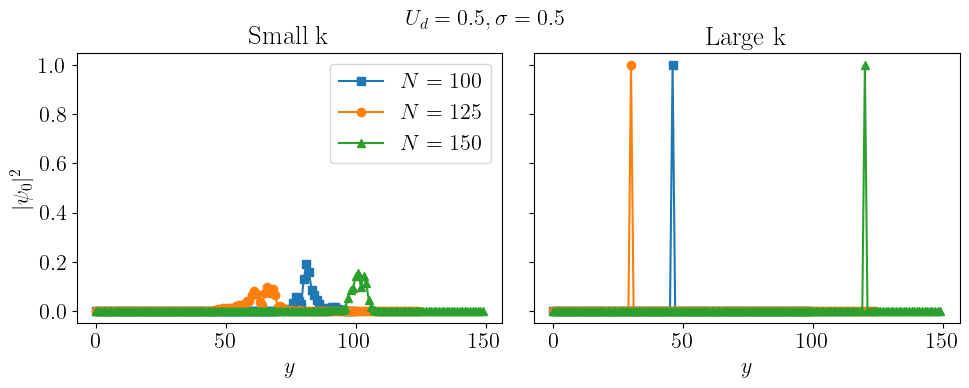

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

xdata1s = range(len(wf1_sk))
xdata2s = range(len(wf2_sk))
xdata3s = range(len(wf3_sk))

xdata1l = range(len(wf1_lk))
xdata2l = range(len(wf2_lk))
xdata3l = range(len(wf3_lk))


ax1.plot(xdata1s , wf1_sk, label=r'$N = {}$'.format(N1), marker='s')
ax1.plot(xdata2s , wf2_sk, label=r'$N = {}$'.format(N2), marker='o')
ax1.plot(xdata3s , wf3_sk, label=r'$N = {}$'.format(N3), marker='^')

ax1.set_ylabel(r"$|\psi_0|^2$")
ax1.set_xlabel(r"$y$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(xdata1l , wf1_lk, label=r'$N = {}$'.format(N1), marker='s')
ax2.plot(xdata2l , wf2_lk, label=r'$N = {}$'.format(N2), marker='o')
ax2.plot(xdata3l , wf3_lk, label=r'$N = {}$'.format(N3), marker='^')

ax2.set_xlabel(r"$y$")
ax2.set_title('Large k')

fig.tight_layout()
fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
plt.savefig(os.path.join(fpath, "wf0_vs_y_$U_d={}_s={}$.pdf".format(Ud, sigma)), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [9]:
# we're plotting the IPR vs wavefunction index for three values of N, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.0
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
N1=100
N2=125
N3=150

ipr1_sk = []
ipr2_sk = []
ipr3_sk = []

ipr1_lk = []
ipr2_lk = []
ipr3_lk = []

run1_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
run2_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
run3_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

run1_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
run2_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
run3_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


ipr1_sk = run1_sk.IPRAllDisr()
ipr2_sk = run2_sk.IPRAllDisr()
ipr3_sk = run3_sk.IPRAllDisr()


ipr1_lk = run1_lk.IPRAllDisr()
ipr2_lk = run2_lk.IPRAllDisr()
ipr3_lk = run3_lk.IPRAllDisr()

range(0, 150)


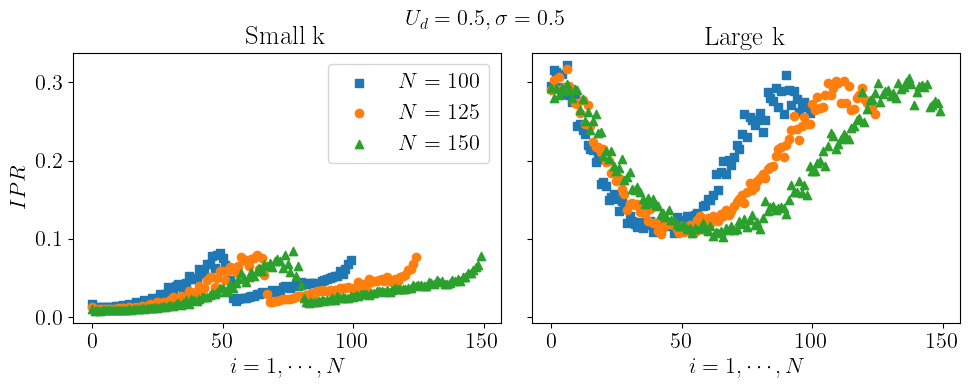

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

xdata1s = range(len(ipr1_sk))
xdata2s = range(len(ipr2_sk))
xdata3s = range(len(ipr3_sk))
xdata1l = range(len(ipr1_lk))
xdata2l = range(len(ipr2_lk))
xdata3l = range(len(ipr3_lk))

print(xdata3s)


ax1.scatter(xdata1s , ipr1_sk, label=r'$N = {}$'.format(N1), marker='s')
ax1.scatter(xdata2s , ipr2_sk, label=r'$N = {}$'.format(N2), marker='o')
ax1.scatter(xdata3s , ipr3_sk, label=r'$N = {}$'.format(N3), marker='^')

ax1.set_ylabel(r"$IPR$")
ax1.set_xlabel(r"$i=1,\cdots,N$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.scatter(xdata1l , ipr1_lk, label=r'$N = {}$'.format(N1), marker='s')
ax2.scatter(xdata2l , ipr2_lk, label=r'$N = {}$'.format(N2), marker='o')
ax2.scatter(xdata3l , ipr3_lk, label=r'$N = {}$'.format(N3), marker='^')

ax2.set_xlabel(r"$i=1,\cdots,N$")
ax2.set_title('Large k')

fig.tight_layout()
fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
plt.savefig(os.path.join(fpath, r'alliprs_vs_index_$U_d={}_s={}$.pdf'.format(Ud, sigma)), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [11]:
# we're plotting ALL IPR vs N, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.0
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
NtAr = [10, 50, 100, 150, 200, 250]

iprN_sk = []
iprN_lk = []


for Ntubes in tqdm(NtAr):

    run_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma)
    run_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma)

    iprN_sk.append( run_sk.IPRAllDisr() )
    iprN_lk.append( run_lk.IPRAllDisr() )


100%|██████████| 6/6 [03:14<00:00, 32.37s/it]


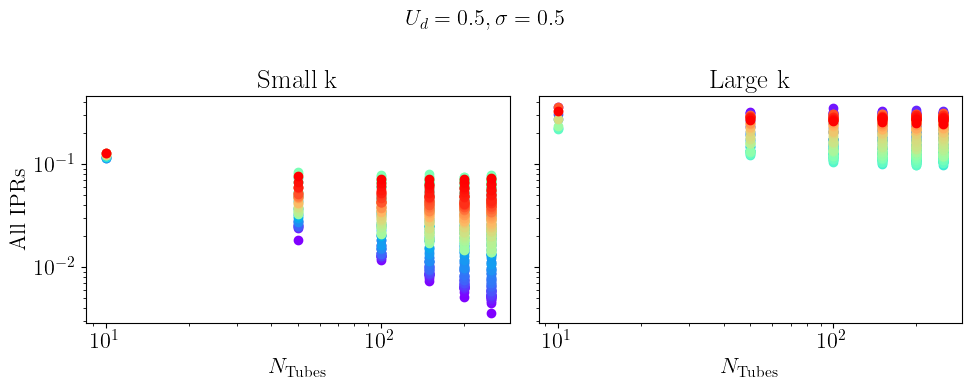

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')


for i in range(len(NtAr)):
    colors = cm.rainbow(np.linspace(0, 1, len(iprN_sk[i])))
    for j in range(len(iprN_sk[i])):
        #color_key = tuple(colors[j])  # Convert numpy array to tuple
        ax1.scatter(NtAr[i] , iprN_sk[i][j], color=colors[j])
        ax2.scatter(NtAr[i] , iprN_lk[i][j], color=colors[j])

ax1.set_ylabel(r"All IPRs")
ax1.set_xlabel(r"$N_{\rm Tubes}$")

ax1.set_title('Small k')
#ax1.legend(loc='best')

ax2.set_xlabel(r"$N_{\rm Tubes}$")
ax2.set_title('Large k')

fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
fig.tight_layout()
plt.savefig(os.path.join(fpath, r'alliprs_vs_N.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [13]:
# let us look at IPR at fix U, as a function of Ud for three values of sigma
# at small k (_sk) and large k (_lk), for N=100 tubes

sigma = 0
Ntubes = 100
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
N1=10
N2=100
N3=1000

Udar = np.linspace(0, 0.5, 11)

iprV1_sk = []
iprV2_sk = []
iprV3_sk = []

iprV1_lk = []
iprV2_lk = []
iprV3_lk = []


for Ud in tqdm(Udar):

    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)


    iprV1_sk.append( run1_sk.IPRDisr() )
    iprV2_sk.append( run2_sk.IPRDisr() )
    iprV3_sk.append( run3_sk.IPRDisr() )

    iprV1_lk.append( run1_lk.IPRDisr() )
    iprV2_lk.append( run2_lk.IPRDisr() )
    iprV3_lk.append( run3_lk.IPRDisr() )

100%|██████████| 11/11 [09:03<00:00, 49.39s/it]


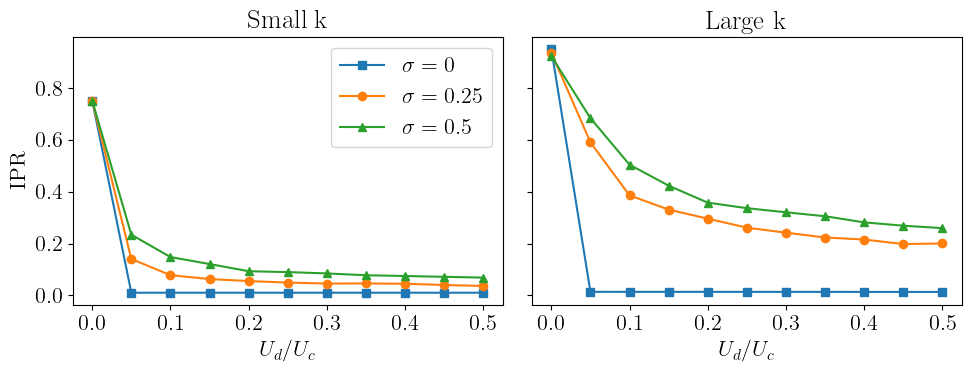

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(Udar , iprV1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(Udar , iprV2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(Udar , iprV3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$U_d/U_c$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(Udar , iprV1_lk, label=r'$\sigma = 0$', marker='s')
ax2.plot(Udar , iprV2_lk, label=r'$\sigma = 0.25$', marker='o')
ax2.plot(Udar , iprV3_lk, label=r'$\sigma = 0.5$', marker='^')

ax2.set_xlabel(r"$U_d/U_c$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig(os.path.join(fpath, r'lowestipr_vs_Ud.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [15]:
# let us look at IPR at fix U, as a function of \sigma for three values of Ud
# at small k (_sk) and large k (_lk)

Ntubes = 100
kx_small = 0.01
kx_large = 10.0
Uc = 1.0
Ndisr = 100

Ud1 = 0.1
Ud2 = 0.25
Ud3 = 0.5

SigmaAr = np.linspace(0, 0.5, 11)
iprS1_sk = []
iprS2_sk = []
iprS3_sk = []

iprS1_lk = []
iprS2_lk = []
iprS3_lk = []


for sigma in tqdm(SigmaAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud1, Ndisr, sigma)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud2, Ndisr, sigma)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud3, Ndisr, sigma)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud1, Ndisr, sigma)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud2, Ndisr, sigma)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud3, Ndisr, sigma)


    iprS1_sk.append( run1_sk.IPRDisr() )
    iprS2_sk.append( run2_sk.IPRDisr() )
    iprS3_sk.append( run3_sk.IPRDisr() )

    iprS1_lk.append( run1_lk.IPRDisr() )
    iprS2_lk.append( run2_lk.IPRDisr() )
    iprS3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 11/11 [08:07<00:00, 44.30s/it]


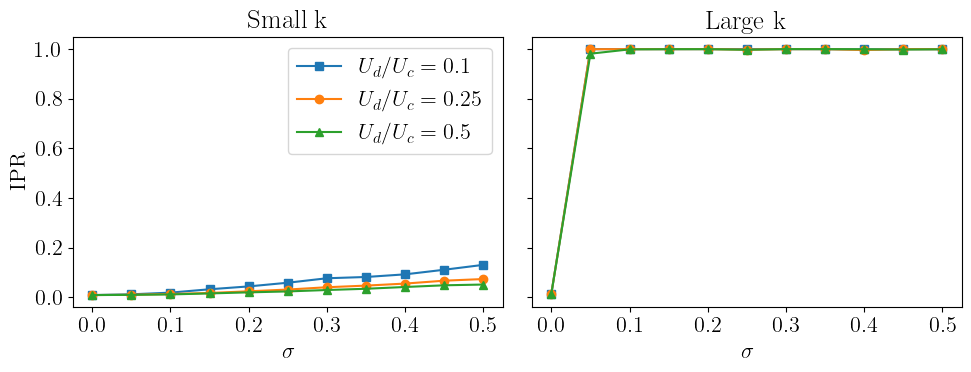

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(SigmaAr , iprS1_sk, label=r'$U_d/U_c = 0.1$', marker='s')
ax1.plot(SigmaAr , iprS2_sk, label=r'$U_d/U_c = 0.25$', marker='o')
ax1.plot(SigmaAr , iprS3_sk, label=r'$U_d/U_c = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$\sigma$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(SigmaAr , iprS1_lk, marker='s')
ax2.plot(SigmaAr , iprS2_lk, marker='o')
ax2.plot(SigmaAr , iprS3_lk, marker='^')

ax2.set_xlabel(r"$\sigma$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig(os.path.join(fpath, r'lowestipr_vs_sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [17]:
# let us look at IPR at fix U, fix Ud, as a function of Ntubes for three sigma
# at small k (_sk) and large k (_lk)

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
Ud = 0.25

NtAr = [10, 50, 100, 150, 200, 250]

sigma1 = 0.1
sigma2 = 0.25
sigma3 = 0.5

iprN1_sk = []
iprN2_sk = []
iprN3_sk = []

iprN1_lk = []
iprN2_lk = []
iprN3_lk = []


for Ntubes in tqdm(NtAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)


    iprN1_sk.append( run1_sk.IPRDisr() )
    iprN2_sk.append( run2_sk.IPRDisr() )
    iprN3_sk.append( run3_sk.IPRDisr() )

    iprN1_lk.append( run1_lk.IPRDisr() )
    iprN2_lk.append( run2_lk.IPRDisr() )
    iprN3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 6/6 [09:54<00:00, 99.16s/it] 


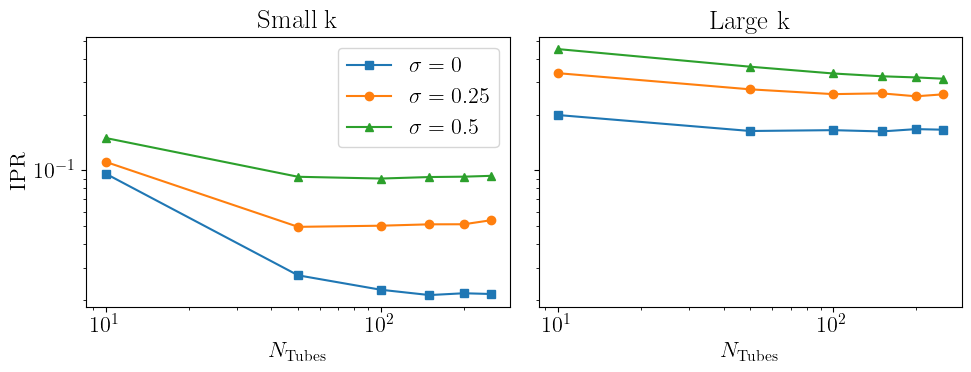

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.plot(NtAr , iprN1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(NtAr , iprN2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(NtAr , iprN3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$N_{\rm Tubes}$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(NtAr , iprN1_lk, marker='s')
ax2.plot(NtAr , iprN2_lk, marker='o')
ax2.plot(NtAr , iprN3_lk, marker='^')

ax2.set_xlabel(r"$N_{\rm Tubes}$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig(os.path.join(fpath, r'lowestipr_vs_N.pdf'), format='pdf', bbox_inches='tight')


plt.show()

In [27]:
# plot of viscosity integrand (wo the oscillatory part) F_12 vs kx for a fixed Ud/Uc, Ntubes=2 (ny=1), sigma

Ntubes = 2
kx_small = 0.01
kx_large = 5.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 100
ny = Ntubes-1

kxar = np.linspace(kx_small, kx_large, Nmesh)

visc1_kx = []
visc2_kx = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for kx in tqdm(kxar):
    run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
    run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
    run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
    visc1_kx.append( np.abs( run1_k.visc_k_ij(ny,1,2,nb) ) )
    visc2_kx.append( np.abs( run2_k.visc_k_ij(ny,1,2,nb) ) )
    visc3_kx.append( np.abs( run3_k.visc_k_ij(ny,1,2,nb) ) )

100%|██████████| 100/100 [00:00<00:00, 622.38it/s]


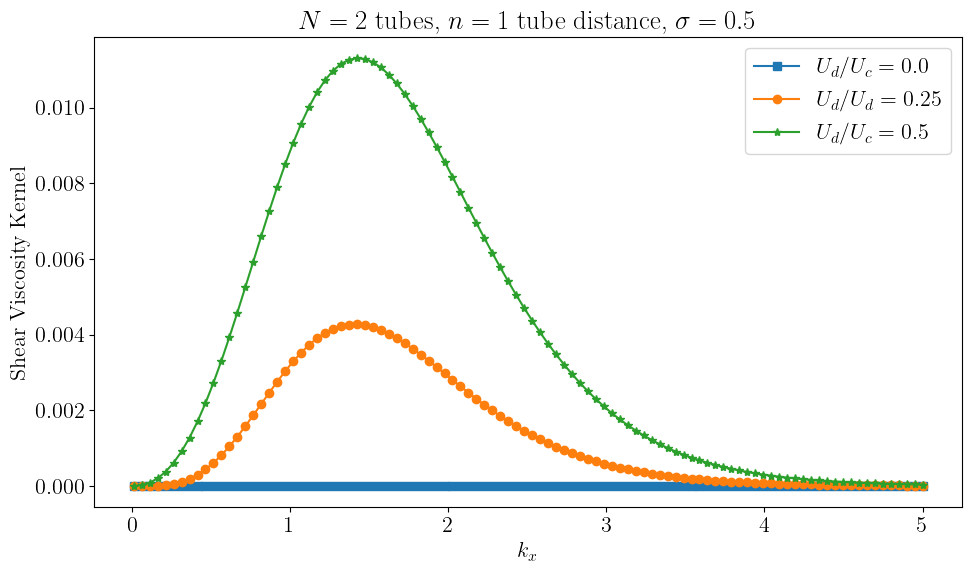

In [28]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$k_x$")
plt.ylabel(r"Shear Viscosity Kernel")
plt.plot(kxar, visc1_kx, label=r'$U_d/U_c = {}$'.format(Ud_1),  marker='s')
plt.plot(kxar, visc2_kx, label=r'$U_d/U_d = {}$'.format(Ud_2), marker='o')
plt.plot(kxar, visc3_kx, label=r'$U_d/U_c = {}$'.format(Ud_3),  marker='*')

plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_intd_vs_k_N=2_sigma={}.pdf'.format(sigma)), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [31]:
# viscosity vs Ud/Uc for a fixed Ntubes, sigma, ny and t

Ntubes = 20
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
sigma_s = 0
sigma_l = 0.5
Nmesh = 100
ny = Ntubes-1
t = 10

Udar = np.linspace(0, 0.5, 11)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

viscs_ud = []
viscs_kx = []
viscl_ud = []
viscl_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for Ud in tqdm(Udar):
    for kx in tqdm(kxar):
        runs_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_s)
        viscs_kx.append( runs_k.visc_k_time(ny,t,nb) )
        runl_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_l)
        viscl_kx.append( runl_k.visc_k_time(ny,t,nb) )

    viscs_ud.append( intg(kxar,viscs_kx) )
    viscl_ud.append( intg(kxar,viscl_kx) )

100%|██████████| 11/11 [1:36:02<00:00, 523.90s/it]


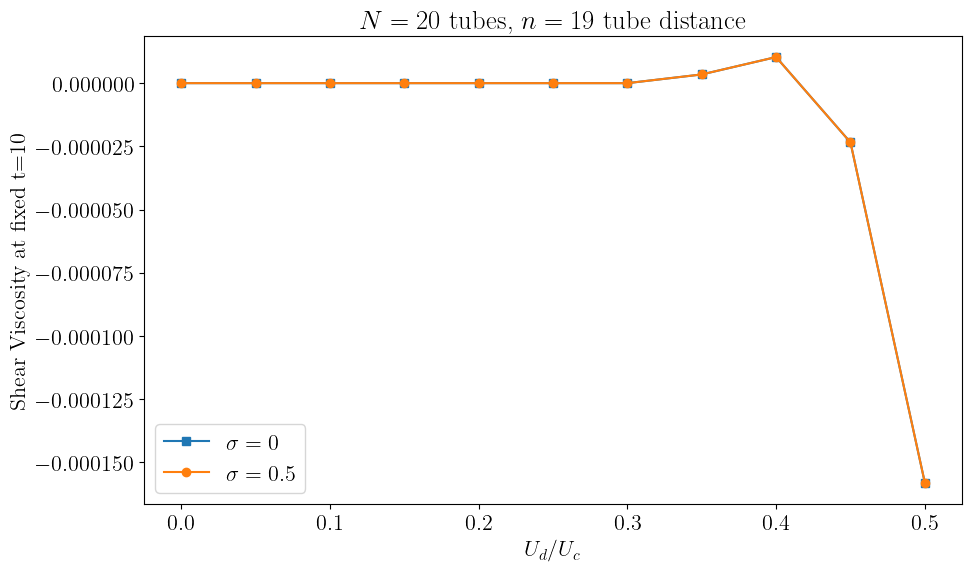

In [32]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$U_d/U_c$")
plt.ylabel(r"Shear Viscosity at fixed t=10")
plt.plot(Udar, viscs_ud, label=r'$\sigma = {}$'.format(sigma_s),  marker='s')
plt.plot(Udar, viscl_ud, label=r'$\sigma = {}$'.format(sigma_l), marker='o')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance".format(Ntubes,ny))

plt.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_vs_sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [33]:
# viscosity vs t for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 20
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud_s = 0.1
Ud_l = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 10
ny = Ntubes-1

tdar = np.arange(0, 3, .001)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

viscs_t = []
viscs_kx = []
viscl_t = []
viscl_kx = []

for t in tqdm(tdar):
    for kx in tqdm(kxar):
        runs_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_s, Ndisr, sigma)
        runl_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_l, Ndisr, sigma)
        viscs_kx.append( runs_k.visc_k_time(ny,t,nb_s) )
        viscl_kx.append( runl_k.visc_k_time(ny,t,nb_l) )
    viscs_t.append( intg(kxar,viscs_kx) )
    viscl_t.append( intg(kxar,viscl_kx) )

  0%|          | 0/3000 [00:00<?, ?it/s]


AttributeError: 'dipolarBEC' object has no attribute 'visc_k'

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$t$")
plt.ylabel(r"Shear Viscosity")
plt.plot(tdar, viscs_t, label=r'$Ud/Uc = {}$'.format(Ud_s),  marker='s')
plt.plot(tdar, viscl_t, label=r'$Ud/Uc = {}$'.format(Ud_l), marker='o')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_vs_t_2ud.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

100%|██████████| 2900/2900 [05:02<00:00,  9.58it/s]


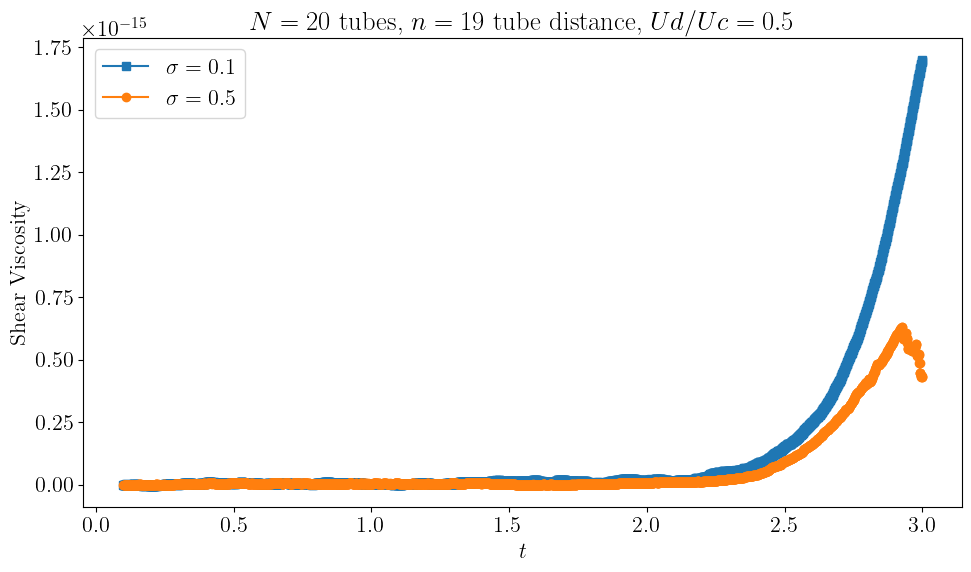

In [22]:
# viscosity vs t for a fixed sigma, Ntubes,  Ud/Uc, ny

Ntubes = 20
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud = 0.5
Ndisr = 100
sigma_s = 0.1
sigma_l = 0.5  
Nmesh = 10
ny = Ntubes-1

tdar = np.arange(0.1, 3, 0.001)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

viscs_t = []
viscs_kx = []
viscl_t = []
viscl_kx = []

nb_s = np.random.uniform(1-sigma_s, 1+sigma_s, Ntubes)
nb_l = np.random.uniform(1-sigma_l, 1+sigma_l, Ntubes)

for t in tqdm(tdar):
    for kx in tqdm(kxar):
        runs_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_s)
        runl_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_l)
        viscs_kx.append( runs_k.visc_k(ny,t) )
        viscl_kx.append( runl_k.visc_k(ny,t) )
    viscs_t.append( intg(kxar,viscs_kx) )
    viscl_t.append( intg(kxar,viscl_kx) )

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$t$")
plt.ylabel(r"Shear Viscosity")
plt.plot(tdar, viscs_t, label=r'$\sigma = {}$'.format(sigma_s),  marker='s')
plt.plot(tdar, viscl_t, label=r'$\sigma = {}$'.format(sigma_l), marker='o')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $Ud/Uc = {}$".format(Ntubes,ny, Ud))

plt.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_vs_t_2sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

100%|██████████| 19/19 [01:58<00:00,  6.24s/it]


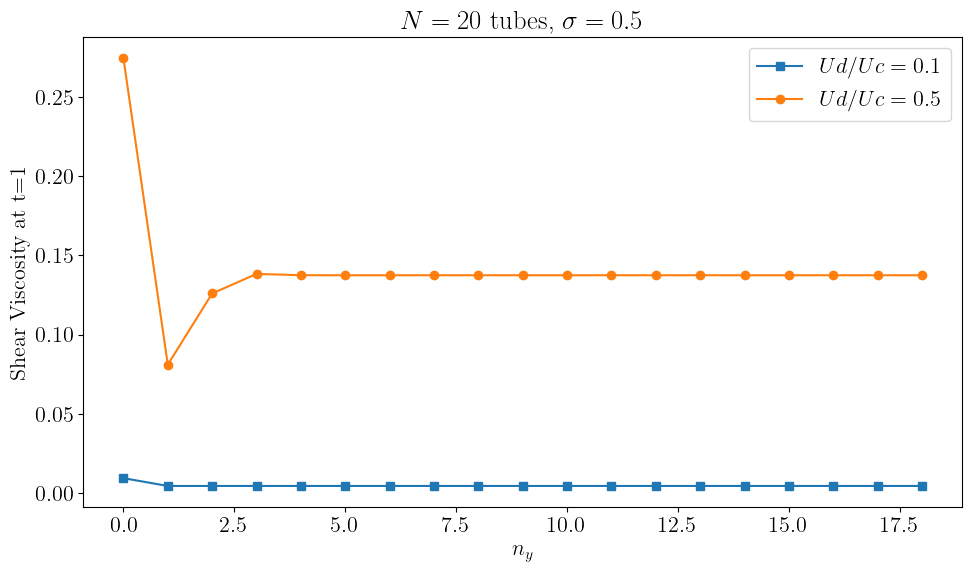

In [23]:
# viscosity vs ny for a fixed Ud/Uc, Ntubes, sigma, t=1

Ntubes = 20
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud_s = 0.1
Ud_l = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 100
t = 1

ndar = np.arange(0, Ntubes-1, 1)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

viscs_n = []
viscs_kx = []
viscl_n = []
viscl_kx = []

for ny in tqdm(ndar):
    for kx in tqdm(kxar):
        runs_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_s, Ndisr, sigma)
        runl_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_l, Ndisr, sigma)
        viscs_kx.append( runs_k.visc_k(ny,t) )
        viscl_kx.append( runl_k.visc_k(ny,t) )
    viscs_n.append( intg(kxar,viscs_kx) )
    viscl_n.append( intg(kxar,viscl_kx) )

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$n_y$")
plt.ylabel(r"Shear Viscosity at t=1")
plt.plot(ndar, viscs_n, label=r'$Ud/Uc = {}$'.format(Ud_s),  marker='s')
plt.plot(ndar, viscl_n, label=r'$Ud/Uc = {}$'.format(Ud_l), marker='o')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $\sigma = {}$".format(Ntubes, sigma))

plt.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_vs_ny.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [26]:
# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 10
ny = Ntubes-1

odar = np.arange(-20, 20, .02)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_or = []
visc1_oi = []
visc1_kx = []
visc2_or = []
visc2_oi = []
visc2_kx = []
visc3_or = []
visc3_oi = []
visc3_kx = []

for o in tqdm(odar):
    for kx in tqdm(kxar):
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
        visc1_kx.append( run1_k.visc_k_om(ny,o) )
        visc2_kx.append( run2_k.visc_k_om(ny,o) )
        visc3_kx.append( run3_k.visc_k_om(ny,o) )
    visc1_or.append( np.real(intg(kxar,visc1_kx)) )
    visc2_or.append( np.real(intg(kxar,visc2_kx)) )
    visc3_or.append( np.real(intg(kxar,visc3_kx)) )
    visc1_oi.append( np.imag(intg(kxar,visc1_kx)) )
    visc2_oi.append( np.imag(intg(kxar,visc2_kx)) )
    visc3_oi.append( np.imag(intg(kxar,visc3_kx)) )

100%|██████████| 10/10 [00:00<00:00, 1246.64it/s]


100%|██████████| 2000/2000 [01:06<00:00, 30.28it/s]


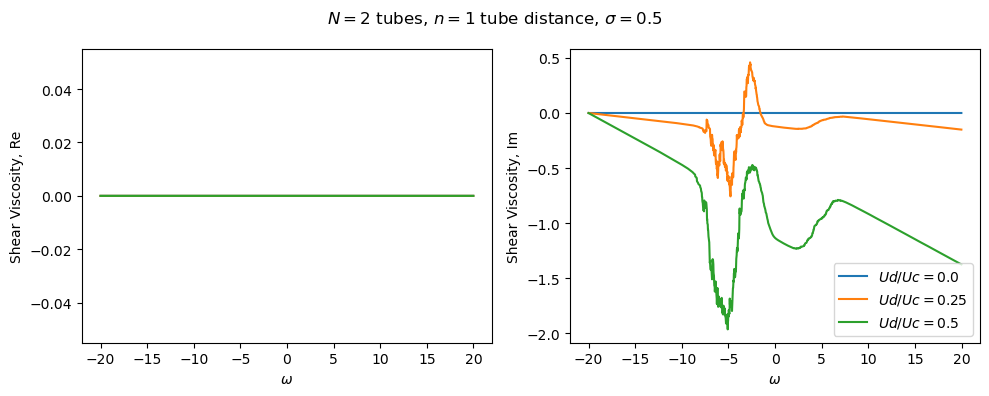

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"Shear Viscosity, Re")
ax1.plot(odar, visc1_or, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax1.plot(odar, visc2_or, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax1.plot(odar, visc3_or, label=r'$Ud/Uc = {}$'.format(Ud_3))
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"Shear Viscosity, Im")
ax2.plot(odar, visc1_oi, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax2.plot(odar, visc2_oi, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax2.plot(odar, visc3_oi, label=r'$Ud/Uc = {}$'.format(Ud_3))
plt.legend(loc='best')
fig.suptitle(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

fig.tight_layout()
plt.savefig(os.path.join(fpath, r'visc_vs_om_2ud_sig={}_N={}.pdf'.format(sigma,Ntubes)), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

100%|██████████| 10/10 [00:00<00:00, 442.97it/s]


100%|██████████| 200/200 [00:03<00:00, 52.88it/s]


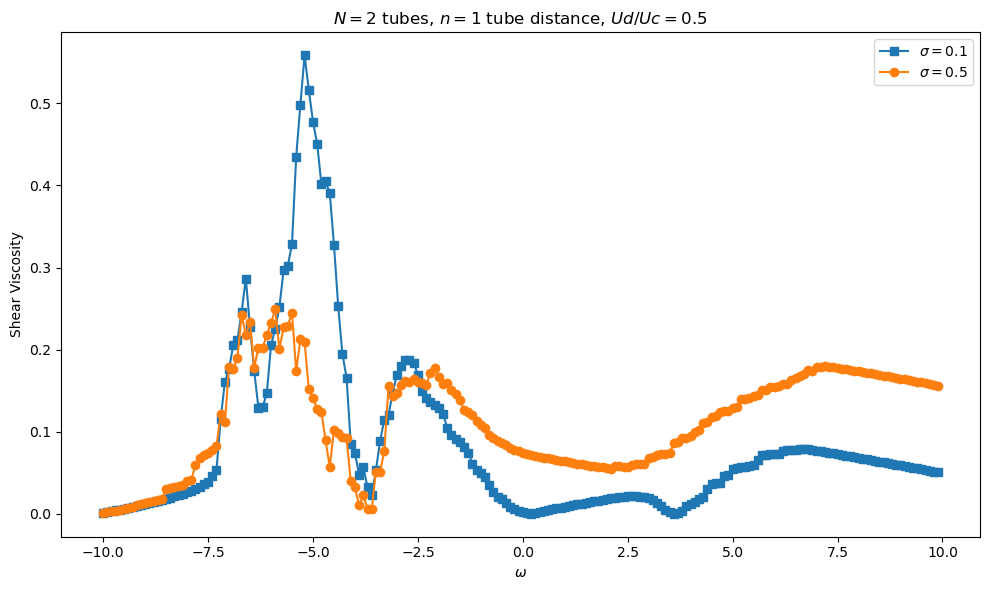

In [12]:
# fourier transform of viscosity vs omega for a fixed sigma, Ntubes,  Ud/Uc, ny

Ntubes = 2
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud = 0.5
Ndisr = 100
sigma_s = 0.1
sigma_l = 0.5  
Nmesh = 10
ny = Ntubes-1

odar = np.arange(-10, 10, .01)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

viscs_o = []
viscs_kx = []
viscl_o = []
viscl_kx = []

for o in tqdm(odar):
    for kx in tqdm(kxar):
        runs_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_s)
        runl_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma_l)
        viscs_kx.append( runs_k.visc_k_om(ny,o) )
        viscl_kx.append( runl_k.visc_k_om(ny,o) )
    viscs_o.append( abs(intg(kxar,viscs_kx)) )
    viscl_o.append( abs(intg(kxar,viscl_kx)) )



In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$\omega$")
plt.ylabel(r"Shear Viscosity")
plt.ylim()
plt.plot(odar, viscs_o, label=r'$\sigma = {}$'.format(sigma_s),  marker='s')
plt.plot(odar, viscl_o, label=r'$\sigma = {}$'.format(sigma_l), marker='o')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $Ud/Uc = {}$".format(Ntubes,ny, Ud))

plt.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_om_2sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [19]:
# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 20
ny = Ntubes-1

odar = np.arange(-20, 20, .02)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_or = []
visc1_oi = []
visc1_kx = []
visc2_or = []
visc2_oi = []
visc2_kx = []
visc3_or = []
visc3_oi = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for kx in tqdm(kxar):
    run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma)
    run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma)
    run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma)
    visc1_kx.append( np.abs( run1_k.visc_k_ij(ny,2,1,nb) ) )
    visc2_kx.append( np.abs( run2_k.visc_k_ij(ny,2,1,nb) ) )
    visc3_kx.append( np.abs( run3_k.visc_k_ij(ny,2,1,nb) ) )

100%|██████████| 20/20 [00:00<00:00, 619.25it/s]


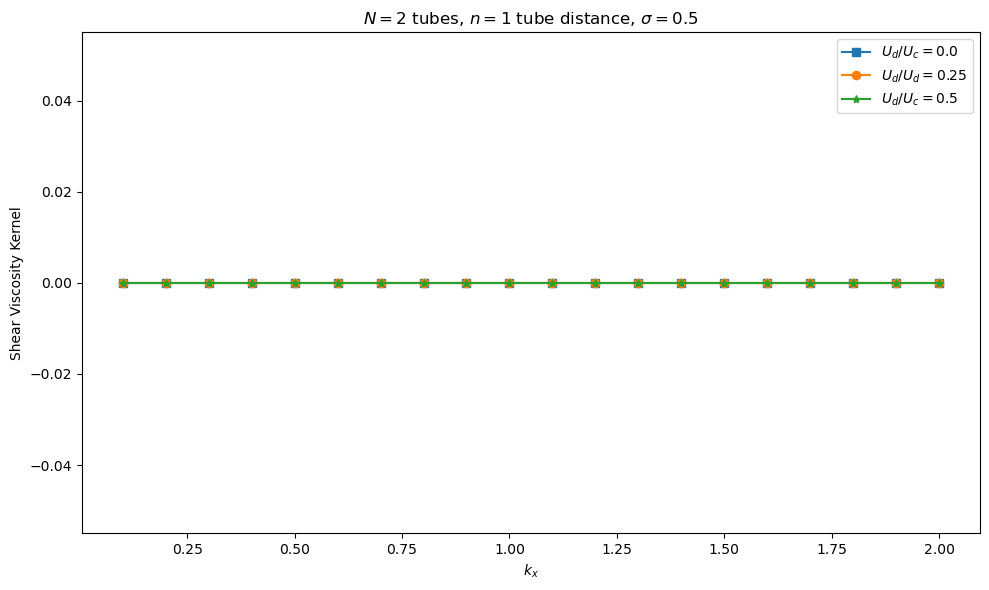

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$k_x$")
plt.ylabel(r"Shear Viscosity Kernel")
plt.ylim()
plt.plot(kxar, visc1_kx, label=r'$U_d/U_c = {}$'.format(Ud_1),  marker='s')
plt.plot(kxar, visc2_kx, label=r'$U_d/U_d = {}$'.format(Ud_2), marker='o')
plt.plot(kxar, visc3_kx, label=r'$U_d/U_c = {}$'.format(Ud_3),  marker='*')

plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_om_2sigma.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()